<a href="https://colab.research.google.com/github/plue1011/ObjectDetection/blob/master/inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# パッケージのimport
from math import sqrt
from itertools import product
import cv2
import time

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import numpy as np
import torch
from torch.autograd import Function
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.init as init
import torch.optim as optimizers
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

In [0]:
# 自作モジュール
# google colobでモジュール読み込みのために必要
import sys
sys.path.append("/content/drive/My Drive/study/CNN/Object_Detection/utils")

from make_network import SSD

from path2dataloader import make_data_path_list
from path2dataloader import Anno_xml2list
from path2dataloader import DataTransform
from path2dataloader import DamageDataset
from path2dataloader import od_collate_fn

from ssd_predict_show import SSDPredictShow

In [0]:
!tar -zxf /content/drive/My\ Drive/study/CNN/dataset/RoadDamageDataset.tar.gz

# 推論

In [5]:
# 動作の確認

# SSD300の設定
ssd_cfg = {
    "num_classes": 8,
    "input_size": 300,  # 画像の入力サイズ
    "bbox_aspect_num": [4, 6, 6, 6, 4, 4],  # 出力するDboxのアスペクト比の種類
    "feature_maps": [38, 19, 10, 5, 3, 1], # 各sourceの画像サイズ
    "s_min": 0.2,
    "s_max":0.9,
    "aspect_ratios":[1, 2, 1/2, 3, 1/3]  # 順番重要(bbox_aspect_numが4種類の時に前から4つである1, 2, 1/2をして欲しいため)
}

model = SSD("inference", ssd_cfg)

# 本番は学習させたモデルを読み込むが今はとりあえず初期値で
net_weights = torch.load("/content/drive/My Drive/study/CNN/weights/ssd300_50.pth", map_location={"cuda:0": "cpu"})
model.load_state_dict(net_weights)

<All keys matched successfully>

## データ1

In [0]:
image_file_path = "/content/RoadDamageDataset/Adachi/JPEGImages/Adachi_20170908142224.jpg"
img = cv2.imread(image_file_path)
height, width, channels = img.shape

In [0]:
input_size = 300
transform = DataTransform(input_size)
phase = "val"
img_transformed, boxes, labels = transform(img, "", "")
img = torch.from_numpy(img_transformed[:, :, (2, 1, 0)]).permute(2, 0, 1)

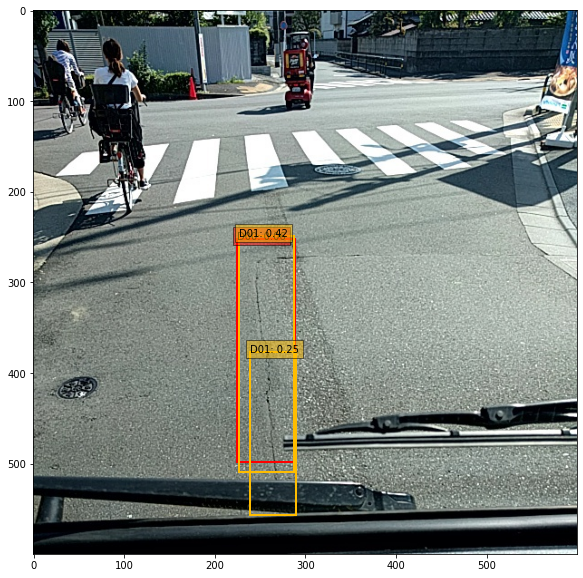

In [21]:
model.eval()
x = img.unsqueeze(0)

detections = model(x)

# ひびの割れ方のクラス
damage_class=["D00", "D01", "D10", "D11", "D20", "D40", "D43", "D44", "30"]

ssd = SSDPredictShow(eval_categories=damage_class, net=model)
ssd.show(image_file_path, data_confidence_level=0.04)

## データ2

In [0]:
image_file_path = "/content/RoadDamageDataset/Nagakute/JPEGImages/Nagakute_20170912145913.jpg"
img = cv2.imread(image_file_path)
height, width, channels = img.shape

In [0]:
input_size = 300
transform = DataTransform(input_size)
phase = "val"
img_transformed, boxes, labels = transform(img, "", "")
img = torch.from_numpy(img_transformed[:, :, (2, 1, 0)]).permute(2, 0, 1)

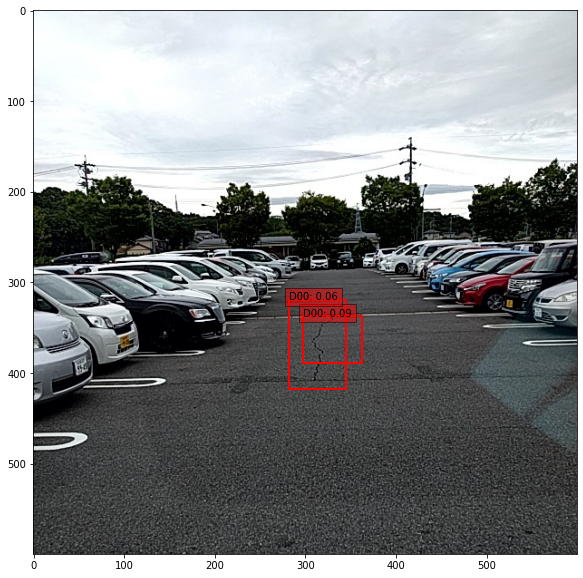

In [17]:
model.eval()
x = img.unsqueeze(0)

detections = model(x)

# ひびの割れ方のクラス
damage_class=["D00", "D01", "D10", "D11", "D20", "D40", "D43", "D44", "30"]

ssd = SSDPredictShow(eval_categories=damage_class, net=model)
ssd.show(image_file_path, data_confidence_level=0.04)

## データ３(valデータ)

In [0]:
image_file_path = "/content/RoadDamageDataset/Adachi/JPEGImages/Adachi_20170912093903.jpg"
img = cv2.imread(image_file_path)
height, width, channels = img.shape

In [0]:
input_size = 300
transform = DataTransform(input_size)
phase = "val"
img_transformed, boxes, labels = transform(img, "", "")
img = torch.from_numpy(img_transformed[:, :, (2, 1, 0)]).permute(2, 0, 1)

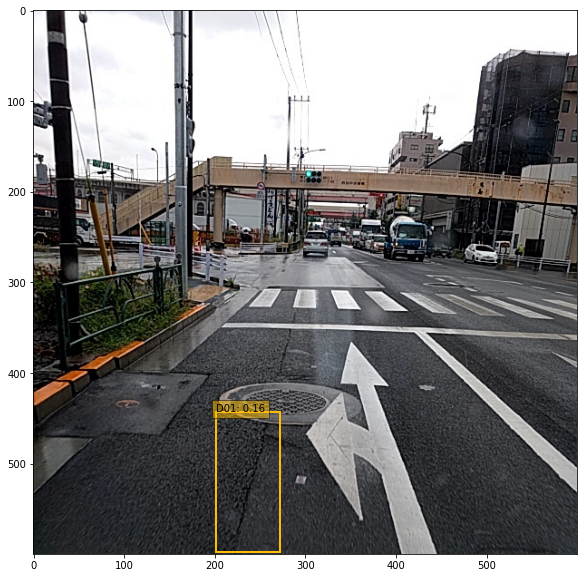

In [32]:
model.eval()
x = img.unsqueeze(0)

detections = model(x)

# ひびの割れ方のクラス
damage_class=["D00", "D01", "D10", "D11", "D20", "D40", "D43", "D44", "30"]

ssd = SSDPredictShow(eval_categories=damage_class, net=model)
ssd.show(image_file_path, data_confidence_level=0.04)